In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
plt.rcParams['figure.figsize'] = 10, 6

In [3]:
nbfolder = get_ipython().starting_dir
def path(*xs):
    return os.path.join(nbfolder, '..', *xs)

### Running algorithm

In [8]:
instance = 'A-n37-k5'

In [9]:
os.makedirs(path('out'), exist_ok=True)

filename_in = path('instances', instance+'.vrp')
filename_out = path('out', instance+'.txt')

In [13]:
with open(filename_in, 'r') as file_in:
    with open(filename_out, 'w') as file_out:
        p = subprocess.Popen(path('bin', 'cfrs'), stdin=file_in, stdout=file_out)

### Reading Data

In [10]:
data = np.loadtxt(filename_out)

In [11]:
clusters_qty = int(np.max(data[:, 2]))+1
clusters_qty

4

In [12]:
clusters = np.split(data, np.where(data[:-1, 2] < data[1:, 2])[0]+1)

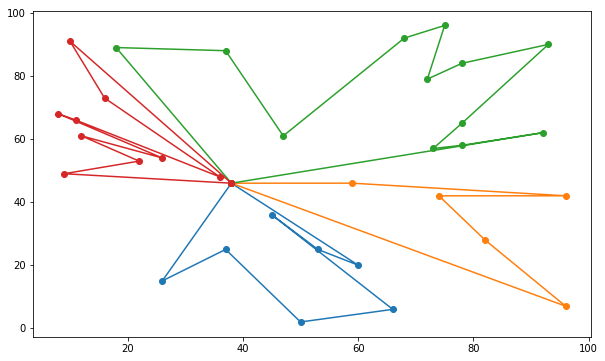

In [14]:
for cluster in clusters:
    
    plt.plot(cluster[:, 0], cluster[:, 1], 'o-')

In [21]:
import sys
sys.path.append(get_ipython().starting_dir)

%load_ext autoreload
%autoreload 2

from swaplist import fix_one

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
c = clusters[0].copy()

True


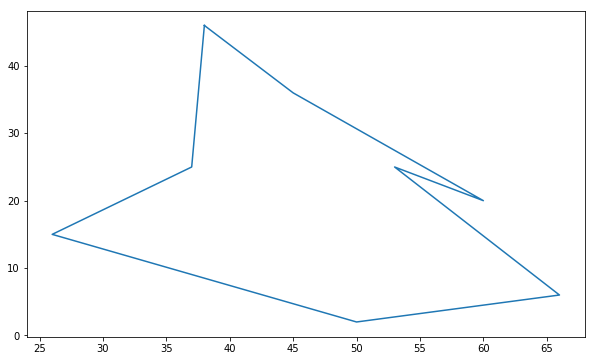

In [79]:
c = list(c)
print(fix_one(c))
c = np.array(c)
plt.plot(c[:,0],c[:,1])

In [71]:
plt.plot(c[:,0],c[:,1])
plt.plot(clusters[0][:,0], clusters[0][:,1])

TypeError: list indices must be integers or slices, not tuple

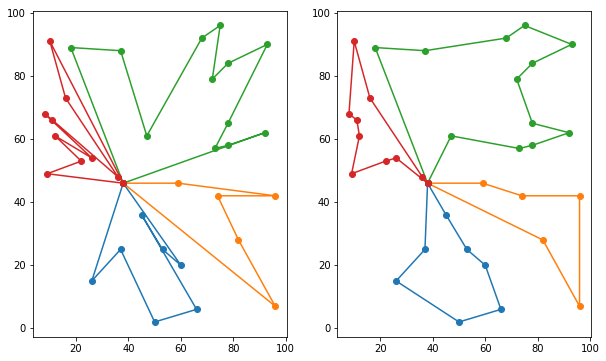

In [83]:
plt.subplot(121)
for cluster in clusters:
    plt.plot(cluster[:, 0], cluster[:, 1], 'o-')

plt.subplot(122)
for cluster in clusters:
    c = cluster.copy()
    for i in range(50):
        c = list(c)
        if not fix_one(c):
            c = np.array(c)
            break
        c = np.array(c)
    plt.plot(c[:,0],c[:,1], 'o-')